Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.


In [3]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [5]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

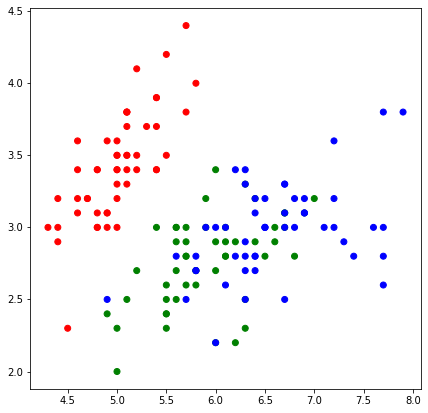

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [7]:
# Используем Евклидову метрику 
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [8]:
# Алгоритм поиска k ближайших соседей. 

def knn(x_train, y_train, x_test, k, q: float = 0.5, weights_search = 'distance'):
    """
    k: int - количество соседей
    
    q: float - гиперпараметр от 0 до 1 для поиска весов
    
    weights_search - параметр, позволяющий выбрать формулу, по которой будут считаться веса. 
        distance - в зависимости от расстояния до соседа.
        number - в зависимости от номера соседа.
    """
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        srt = sorted(test_distances)[0:k]
        for d in srt:
            if  weights_search == 'number': # С поиском весов для соседей в зависимости от номера соседа. w(i) = q^i, значения i в интервале (0,1).
                weight = q**srt.index(d)
            else:   
                weight = q**d[0]          # С поиском весов для соседей в зависимости от расстояния до соседа. w(d) = q^d, значения q в интервале (0,1).  
            classes[d[1]] += weight
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [9]:
#Функция для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [38]:
# Функция графика распределения классов.

def get_graph(X_train, y_train, k, q, axes_counter, accuracy, weights_search):
    axi = ax.flatten()[axes_counter]
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .04

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_search)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    axi.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    axi.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    axi.set_xlim(xx.min(), xx.max())
    axi.set_ylim(yy.min(), yy.max())
    axi.set_title(f"k= {k}, q= {q}, w_search: {weights_search}, accur= {round(accuracy_, 2)} ")


In [15]:
kk = [1, 3, 5, 9]
qq = [0.25, 0.5, 0.75]

<ipython-input-38-f5dba1f316da>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axi.pcolormesh(xx, yy, Z, cmap=cmap_light)


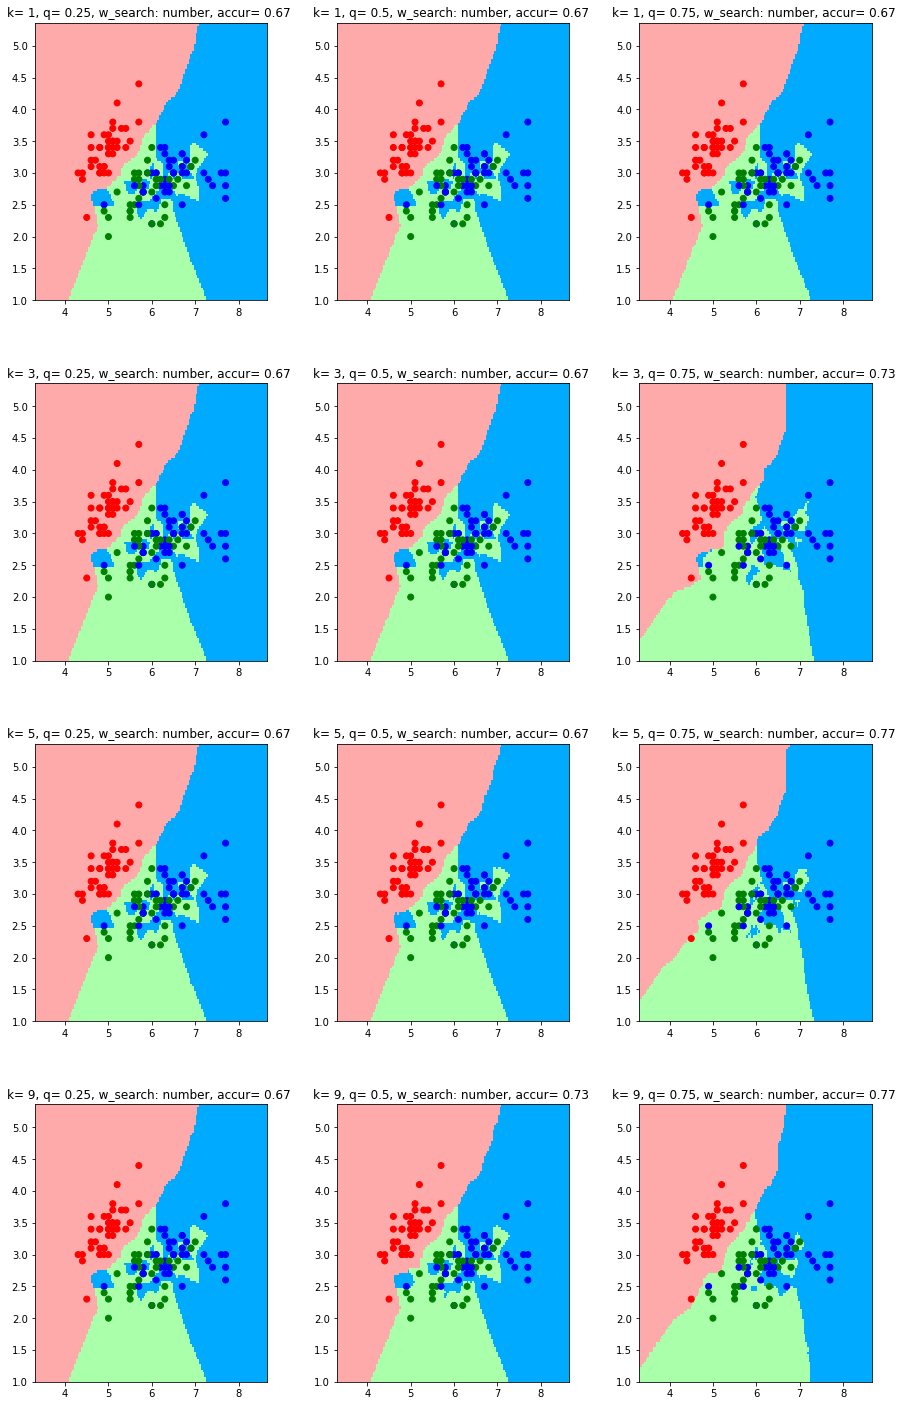

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [40]:
fig, ax = plt.subplots(nrows = 4, ncols = 3)
fig.set_size_inches(15, 25)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axes_counter = 0
for k in kk:
    for q in qq:
        y_pred = knn(X_train, y_train, X_test, k, q, weights_search = 'number')
        accuracy_ = accuracy(y_pred, y_test)
        get_graph(X_train, y_train, k, q, axes_counter, accuracy, weights_search = 'number')
        axes_counter +=1

<ipython-input-38-f5dba1f316da>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axi.pcolormesh(xx, yy, Z, cmap=cmap_light)


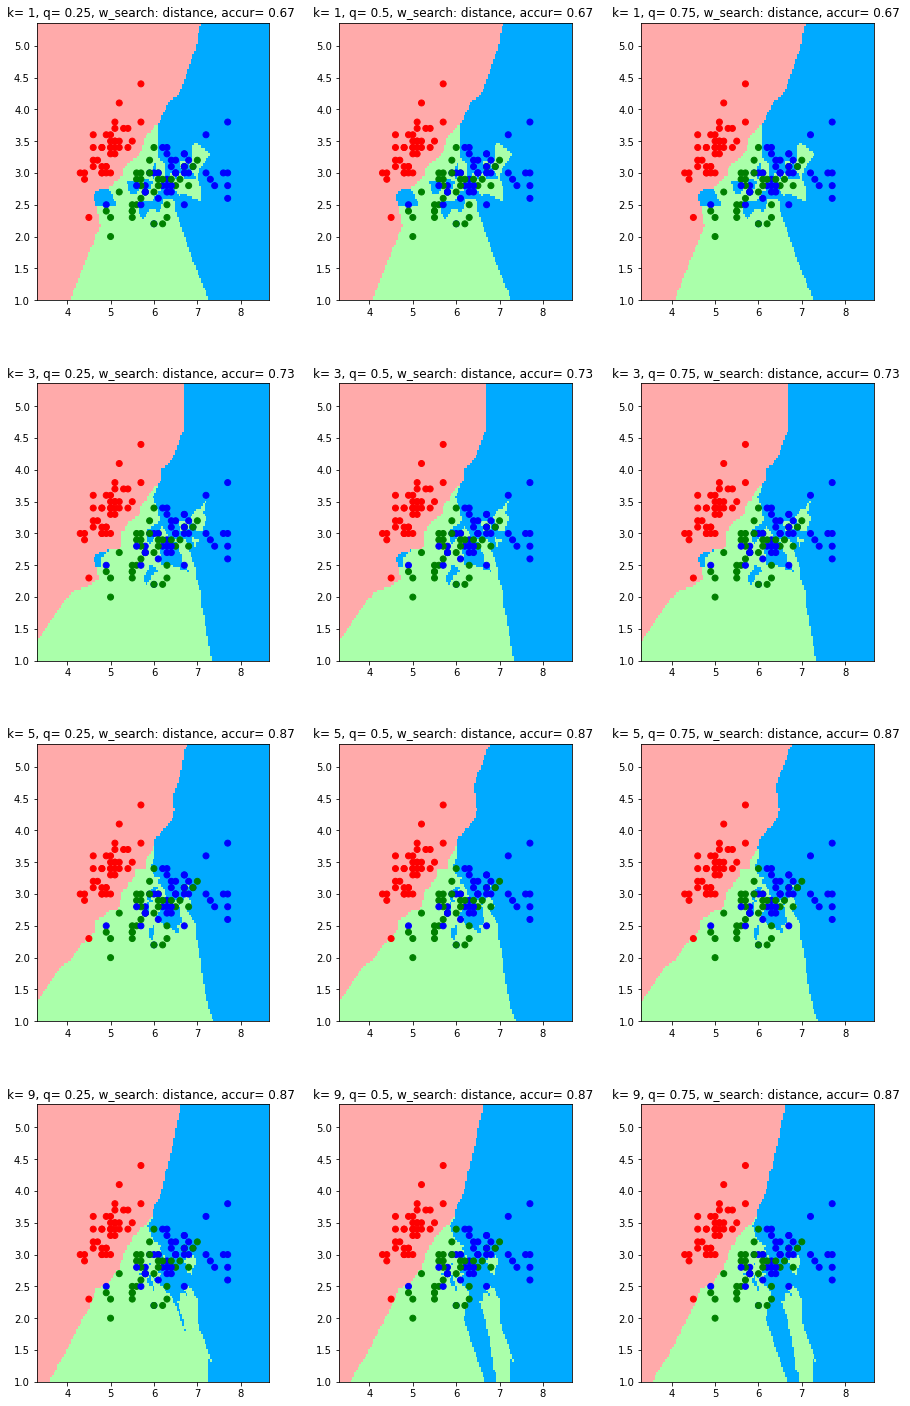

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [41]:
fig, ax = plt.subplots(nrows = 4, ncols = 3)
fig.set_size_inches(15, 25)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axes_counter = 0
for k in kk:
    for q in qq:
        y_pred = knn(X_train, y_train, X_test, k, q, weights_search = 'distance')
        accuracy_ = accuracy(y_pred, y_test)
        get_graph(X_train, y_train, k, q, axes_counter, accuracy, weights_search = 'distance')
        axes_counter +=1

При 1 и 3 классах модель еще недостаточно обучена, как при добавлении весов для соседей в зависимости от номера соседа, так и при добавлении зависимости от дистанции соседа. При 9 классах наблюдается переобучение. 
При 5 классах, с зависимостью весов от дистанции до соседа модель показывают лучшую точность (при этом параметр q не влияет на результат). В модели с зависимостью весов от номера соседа также наилучшая точность наблюдается при 5 соседях (однако в этом случае параметр q влияет на результат, точность выше с параметром q = 0.75).

Оптимальное параметры: 1) для модели с зависимостью весов от номера соседа, k=5, q=0.75, пр этом точность равна 0.77.
2) для модеи с зависимостью от дистанции соседей, k=5, q=0.5, точность равна 0.87
Значит, для этих данных лучшая модель с зависимостью весов от дистанции соседей с количеством соседей 5.

Задание 4: (опция) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [21]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

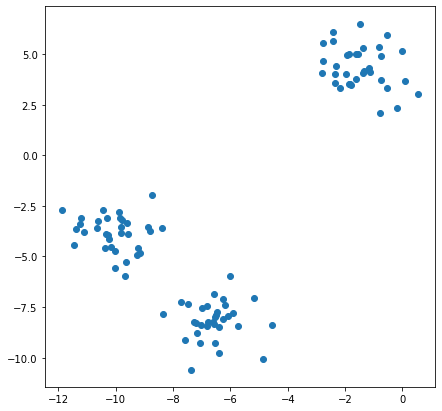

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [23]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [25]:
def intra_dist(centroids, classes):
    intra_dist = np.array([1 / len(classes[key]) * np.array([e_metrics(x, centroids[key]) ** 2 for x in classes[key]]).sum() for key in classes.keys()]).sum()
    return intra_dist

In [26]:
# определим максимальное количество итераций
max_iterations = 5

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4



In [28]:
intra_distance = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    intra_distance.append(intra_dist(centroids, clusters))

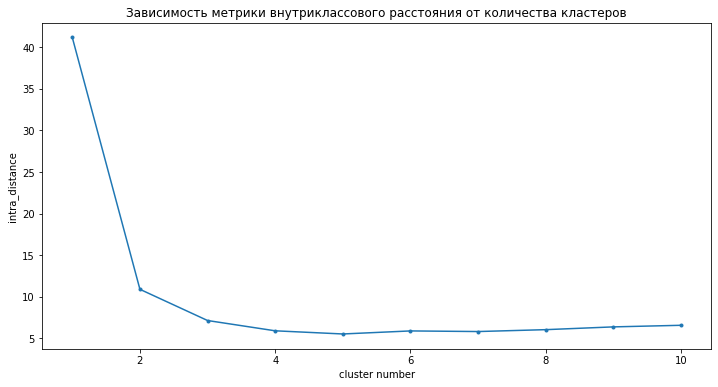

In [34]:
plt.figure(figsize=(12, 6))
plt.title('Зависимость метрики внутриклассового расстояния от количества кластеров')
plt.xlabel('cluster number')
plt.ylabel('intra_distance')

plt.plot(range(1, 11), intra_distance, marker = '.')


plt.show()

Оптимальное количество класстеров 3-4. Между ними разница незначительная, поэтому для экономии времени вычисления можно взять 3 кластера. После 5 кластеров начинается переобучение модели.

In [31]:
# Функция визуализации кластеров.
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

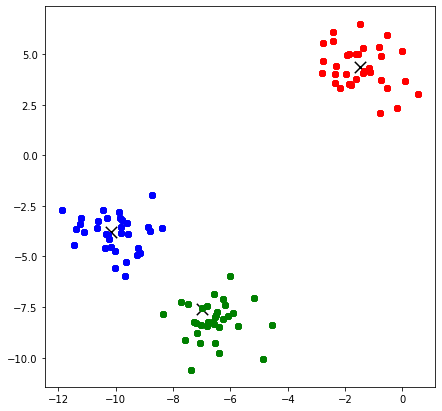

In [33]:
# зададим оптимальное количество кластеров
centroids, clusters = kmeans(X, 3, max_iterations, min_distance)
visualize(centroids, clusters)

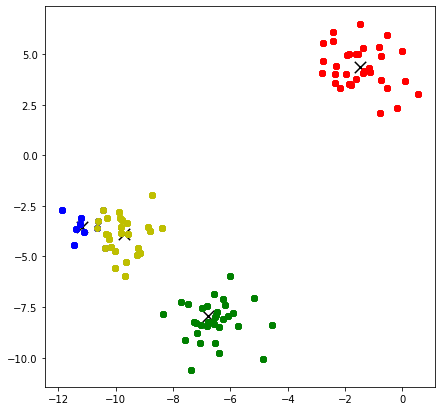

In [32]:
# зададим оптимальное количество кластеров
k = 4
centroids, clusters = kmeans(X, 4, max_iterations, min_distance)
visualize(centroids, clusters)